# Project: Wrangling and Analyze Data

In [1]:
import requests
import numpy as np
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import json
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twtArchive = pd.read_csv('twitter-archive-enhanced.csv')
twtArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as data:
    data.write(req.content)
predic = pd.read_csv('image_predictions.tsv',sep='\t')
predic.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:

cKey = '****'
cSec = '****'
aTok = '****'
aSec = '****'

OAuth = tweepy.OAuthHandler(cKey,cSec)
OAuth.set_access_token(aTok,aSec)

api = tweepy.API(OAuth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
tweet_ids = twtArchive.tweet_id.values
len(tweet_ids)

2356

In [6]:
tweetfound = []
tweetnotfound = []
for tweet_id in twtArchive['tweet_id']:   
    try:
        tweetfound.append(api.get_status(tweet_id))
    except Exception as err:
        tweetnotfound.append(tweet_id)
        print('fail')
print('Done. ')

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
Rate limit reached. Sleeping for: 746
fail
fail
Rate limit reached. Sleeping for: 747
Done. 


In [7]:
len(tweetfound)

2327

In [8]:
lst = []
for x in tweetfound:
    lst.append(x)
    
with open('tweepyjon.txt', 'w') as file:
    file.write(json.dumps(lst, indent = 4))

In [9]:
lst2 = []
with open('tweepyjon.txt', encoding='utf-8') as dotJSON:
    loadData = json.load(dotJSON)
    for y in loadData:
        tweet_id = y['id']
        favorite_count = y['favorite_count']
        retweet_count = y['retweet_count']
        
        lst2.append({'tweet_id': str(tweet_id),
                     'favorite_count': int(favorite_count),
                     'retweet_count': int(retweet_count)})
        
        likeRTDF = pd.DataFrame(lst2, columns = ['tweet_id', 'favorite_count','retweet_count'])

In [10]:
likeRTDF.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33772,6987
1,892177421306343426,29293,5290
2,891815181378084864,22024,3468
3,891689557279858688,36883,7213
4,891327558926688256,35255,7739


In [11]:
likeRTDF.shape

(2327, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



First, I want to get a general look at our data.

In [12]:
twtArchive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
twtArchive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
twtArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Looking at this section of data I notice a lot of the name fields do not contain actual names. These will need to be addressed. I will need to check how many fit in to this category.

In [15]:
twtArchive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Toby           7
Bailey         7
Rusty          6
Koda           6
Jax            6
Scout          6
Dave           6
Stanley        6
Milo           6
Bella          6
Leo            6
Jack           6
Oscar          6
Oakley         5
            ... 
Wesley         1
Kody           1
Clifford       1
Herb           1
Sora           1
Bobble         1
Sailor         1
Liam           1
Sunshine       1
Dylan          1
Puff           1
Chevy          1
Anthony        1
Odin           1
Darrel         1
DonDon         1
Donny          1
Shnuggles      1
Iroh           1
Creg           1
Kayla          1
Newt           1
Skittles       1
Aldrick        1
Jockson        1
Bronte         1
Pancake        1
Arlo          

It looks like many of these are labeled none instead of NaN, this will also need to be fixed. Helpfully, it also seems like most of the non-name values are lower case. This will help me sort through them later.

Next, I want to see what type of data these columns contain, and how many are null in each row.

In [16]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I can see quite a few issues to fix off the bat. It looks like there are 78 reply tweets and 181 retweets. These will need to be removed. Additionally, these rows are mostly null values and will not be needed once the reply and retweets are removed. They will need to be removed for data clarity. I also notice that some of the values in the expanded_urls are missing, this will also need to be addressed. Next, I notice that the timestamp and retweeted_status_timestamp columns are not the proper data type, they will need to be converted. Lastly, as I also noticed when looking at the head and tail, the doggo, floofer, pupper, and puppo columns do not use nulls, this makes it look like all of them have data, but this is untrue. The “None” data will need to be converted to null.

In [17]:
predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
predic.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
likeRTDF.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33772,6987
1,892177421306343426,29293,5290
2,891815181378084864,22024,3468
3,891689557279858688,36883,7213
4,891327558926688256,35255,7739


In [21]:
likeRTDF.tail()

,tweet_id,favorite_count,retweet_count
2322,666049248165822465,88,36
2323,666044226329800704,247,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39
2326,666020888022790149,2288,422


In [22]:
likeRTDF.describe()

,favorite_count,retweet_count
count,2327.000000,2327.000000
mean,7043.406102,2465.834551
std,10945.596016,4175.727468
min,0.000000,1.000000
25%,1222.500000,493.500000
50%,3047.000000,1148.000000
75%,8587.000000,2854.000000
max,144649.000000,70566.000000


### Quality issues
1. The archive data seems to determine the name of the dog by just picking up the word after "This is" or "Here is". This leads to a high volume of dogs that have the name "a" or "an".

2. There are 78 reply tweets, to examine this data set we need only top level tweets.

3. Retweets are present in the data and should be removed as we are only examining original tweets.

4. The doggo, floofer, pupper, and puppo columns do not use nulls. This means when using something like info() the numbers won't reflect how many are actually populated.

5. There are missing values in the expanded_urls.

6. Timestamp and retweeted_status_timestamp are the wrong data type.

7. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp all appear to be unneeded for our purposes and could be dropped.Retweets are present in the data and should be removed.

8. Adddtionally in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are almost all null.

Once these have been changed, the following changes will make the code much easier to work with and imporve tidiness.

### Tidiness issues
1. Join the tables made with the image predictions and the favorite and retweet data.

2. Change the way doggo, floofer, pupper, and puppo are stored. Convert to a single column that contains which type they are.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
copy_of_twtArchive = twtArchive.copy()
copy_of_predic = predic.copy()
copy_of_likeRTDF = likeRTDF.copy()

### Issue #1: The archive data seems to determine the name of the dog by just picking up the word after "This is" or "Here is". This leads to a high volume of dogs that have the name "a" or "an".

#### Define: The process for the tweet archive defining what a name is appears to have made several mistakes. To correct this I will remove all non-names from the data and set them to null.

#### Code

In [24]:
twtArchive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Toby           7
Bailey         7
Rusty          6
Koda           6
Jax            6
Scout          6
Dave           6
Stanley        6
Milo           6
Bella          6
Leo            6
Jack           6
Oscar          6
Oakley         5
            ... 
Wesley         1
Kody           1
Clifford       1
Herb           1
Sora           1
Bobble         1
Sailor         1
Liam           1
Sunshine       1
Dylan          1
Puff           1
Chevy          1
Anthony        1
Odin           1
Darrel         1
DonDon         1
Donny          1
Shnuggles      1
Iroh           1
Creg           1
Kayla          1
Newt           1
Skittles       1
Aldrick        1
Jockson        1
Bronte         1
Pancake        1
Arlo          

In [25]:
toRemove = list(twtArchive[twtArchive.name.str.islower()].name.unique())

Before running my code, I want to ensure none of these are lowercase names.

In [26]:
print(toRemove)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


None of these look like a name so I will go forward with removing them.

In [27]:
# None is capitalized and will need to be removed first
twtArchive['name'].replace('None', np.nan, inplace = True)
twtArchive['name'].replace(toRemove, np.nan, inplace = True)

#### Test

In [28]:
twtArchive['name'].value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
Bella         6
Scout         6
Dave          6
Jax           6
Milo          6
Oscar         6
Jack          6
Koda          6
Rusty         6
Leo           6
Stanley       6
Louis         5
George        5
Sammy         5
Sunny         5
Larry         5
             ..
Kody          1
Clifford      1
Herb          1
Sora          1
Duddles       1
Scruffers     1
Timmy         1
Pupcasso      1
Trigger       1
Bobble        1
Odin          1
Darrel        1
DonDon        1
Winifred      1
Shnuggles     1
Sunshine      1
Iroh          1
Kayla         1
Newt          1
Skittles      1
Aldrick       1
Jockson       1
Bronte        1
Pancake       1
Arlo          1
Zuzu          1
Creg          1
Liam          1
Sailor        1
Kallie        1
Name: name, Length: 931,

This name list now looks much better.

### Issue #2: There are 78 reply tweets, to examine this data set we need only top level tweets.

#### Define: Our instructions state that we are to examine only original, top level tweets, as these are the ones that will fit the model we are examining. To accomplish this reply tweets must be removed.

#### Code

In [29]:
twtArchive[twtArchive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,NaN,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,NaN,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,NaN,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,None,None,None,None


In [30]:
twtArchive[twtArchive.in_reply_to_status_id.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          1501 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

In [31]:
twtArchive = twtArchive[twtArchive.in_reply_to_status_id.isna()]

#### Test

In [32]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          1501 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

### Issue #3: Retweets are present in the data and should be removed as we are only examining original tweets.

#### Define: Our data set contains tweets that aren't original to the 'WeRateDogs' twitter account. these must be removed.

#### Code

In [33]:
twtArchive[twtArchive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [34]:
twtArchive = twtArchive[twtArchive.retweeted_status_id.isna()]

#### Test

In [35]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #4: The doggo, floofer, pupper, and puppo columns do not use nulls. This means when using something like info() the numbers won't reflect how many are actually populated.

#### Define: When the archive cannot find an instance of "doggo, floofer pupper or puppo" it marks it as none. But none is recognized as a name and not a null, meaning when  using things like .info() it looks like there are 0 null records in these columns. To correct this I will set all instances of none to NaN for each column.

#### Code

First, I want to confirm how many of each type there should be.

In [36]:
twtArchive['doggo'].value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [37]:
twtArchive['floofer'].value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [38]:
twtArchive['pupper'].value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [39]:
twtArchive['puppo'].value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [40]:
twtArchive['doggo'].replace('None', np.nan, inplace = True)
twtArchive['floofer'].replace('None', np.nan, inplace = True)
twtArchive['pupper'].replace('None', np.nan, inplace = True)
twtArchive['puppo'].replace('None', np.nan, inplace = True)

#### Test

In [41]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(4), int64(3), object(10)
memory

These numbers match my earlier counts.

### Issue #5: There are missing values in the expanded_urls.

#### Define: It's unclear why but there appears to be several missing values in the expanded_urls column. Due to the reason being unclear and having no known way to get this data back, these records will be dropped.

#### Code

In [42]:
twtArchive[twtArchive.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,pupper,NaN


In [43]:
twtArchive = twtArchive[twtArchive.expanded_urls.notnull()]

#### Test

In [44]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          1390 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        229 non-null object
puppo                         24 non-null object
dtypes: float64(4), int64(3), object(10)
memory

### Issue #6: Timestamp and retweeted_status_timestamp are the wrong data type.

#### Define: These timestamp fields are currently labeled as objects and not datetime. This process gets a little simpler now that we have removed the retweets and no longer need the retweeted_status_timestamp field to be changed.

#### Code

In [45]:
twtArchive.timestamp = pd.to_datetime(twtArchive.timestamp)

#### Test

In [46]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          1390 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        229 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4), 

### Issue #7: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp all appear to be unneeded for our purposes and could be dropped.Retweets are present in the data and should be removed.

### Issue #8: Adddtionally in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are almost all null.

#### Define: Because of the solution to previous problems the solution to problems 7 and 8 are now the same. After looking at pervious issues its clear that these rows must be dropped, they have no use in our data and any record with data in these columns has already been removed. So to resolve both of these issues these columns will be dropped from the data.

#### Code

In [47]:
twtArchive.drop(['in_reply_to_status_id'], axis = 1, inplace = True)
twtArchive.drop(['in_reply_to_user_id'], axis = 1, inplace = True)
twtArchive.drop(['retweeted_status_id'], axis = 1, inplace = True)
twtArchive.drop(['retweeted_status_user_id'], axis = 1, inplace = True)
twtArchive.drop(['retweeted_status_timestamp'], axis = 1, inplace = True)

In [48]:
likeRTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


#### Test

In [49]:
twtArchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


### Tidiness Issue #1: Join the tables made with the image predictions and the favorite and retweet data.

#### Define: To properly store this data in one master CSV having all of the data joined together will be needed.

#### Code

In [50]:
predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
predic = predic[['tweet_id','jpg_url','p1','p1_conf']]

In [52]:
predic.head()

,tweet_id,jpg_url,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [53]:
merged = pd.merge(predic, twtArchive, on = 'tweet_id', how = 'inner')

In [54]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id              1971 non-null int64
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(10)
memory usage: 246.4+ KB


In [55]:
likeRTDF['tweet_id'] = pd.to_numeric(likeRTDF['tweet_id'])
likeRTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [56]:
merged = pd.merge(merged, likeRTDF, on = 'tweet_id', how = 'inner')

In [57]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 17 columns):
tweet_id              1963 non-null int64
jpg_url               1963 non-null object
p1                    1963 non-null object
p1_conf               1963 non-null float64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
doggo                 72 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 276.0+ KB


#### Test

In [58]:
merged.head()

,tweet_id,jpg_url,p1,p1_conf,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,2288,422
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,112,39
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,100,36
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,247,115
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,88,36


In [59]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 17 columns):
tweet_id              1963 non-null int64
jpg_url               1963 non-null object
p1                    1963 non-null object
p1_conf               1963 non-null float64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
doggo                 72 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 276.0+ KB


### Tidiness Issue #2: Change the way doggo, floofer, pupper, and puppo are stored. Convert to a single column that contains which type they are.

#### Define: Having the labels of Doggo, Floofer, Pupper, and Puppo stored in 3 columns creates issues when trying to visulize and work with the data. To fix this issue I will merge these columns into a single one named 'Type' and store them as one column.

#### Code

In [60]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 17 columns):
tweet_id              1963 non-null int64
jpg_url               1963 non-null object
p1                    1963 non-null object
p1_conf               1963 non-null float64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
doggo                 72 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 276.0+ KB


In [61]:
# Replacing the null values with empty spaces to allow easy concat
merged['doggo'].fillna('', inplace=True)
merged['floofer'].fillna('', inplace=True)
merged['pupper'].fillna('', inplace=True)
merged['puppo'].fillna('', inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 17 columns):
tweet_id              1963 non-null int64
jpg_url               1963 non-null object
p1                    1963 non-null object
p1_conf               1963 non-null float64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 276.0+ KB


In [62]:
merged['Type'] = merged['doggo'] + merged['pupper'] + merged['floofer'] + merged['puppo']

In [63]:
# Adding back the null values
merged['Type'].replace('', np.nan, inplace = True)
# Adding a dash in the combinations to improve readability
merged['Type'].replace('doggopupper', 'doggo-pupper', inplace = True)
merged['Type'].replace('doggofloofer', 'doggo-floofer', inplace = True)
merged['Type'].replace('doggopuppo', 'doggo-puppo', inplace = True)

In [64]:
# The original columns are no longer needed
merged.drop(['doggo'], axis = 1, inplace = True)
merged.drop(['pupper'], axis = 1, inplace = True)
merged.drop(['floofer'], axis = 1, inplace = True)
merged.drop(['puppo'], axis = 1, inplace = True)

#### Test

In [65]:
merged['Type'].value_counts()

pupper           201
doggo             62
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: Type, dtype: int64

In [66]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
tweet_id              1963 non-null int64
jpg_url               1963 non-null object
p1                    1963 non-null object
p1_conf               1963 non-null float64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
Type                  302 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 230.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
merged.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

I believe the best insights will come from the anaysis of the retweets and favorites, so I want to know what the numbers look like on their own.

In [68]:
merged['retweet_count'].describe()

count     1963.000000
mean      2253.447275
std       4030.369479
min         11.000000
25%        495.000000
50%       1086.000000
75%       2577.500000
max      70566.000000
Name: retweet_count, dtype: float64

In [69]:
merged['favorite_count'].describe()

count      1963.000000
mean       7745.198675
std       11410.134464
min          66.000000
25%        1650.500000
50%        3497.000000
75%        9636.000000
max      144649.000000
Name: favorite_count, dtype: float64

Now I want to look out how the different types effect the expected favorites and retweets.

In [70]:
groupMeanType = merged.groupby('Type')['retweet_count'].mean()
groupMeanTypeFav = merged.groupby('Type')['favorite_count'].mean()
groupMeanName = merged.groupby('name')['retweet_count'].mean()
groupMeanNameFav = merged.groupby('name')['favorite_count'].mean()

Text(0,0.5,'Average retweets')

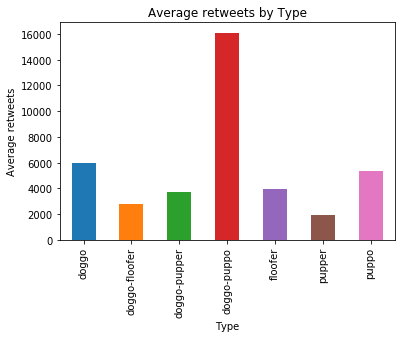

In [71]:
retweetsByType = groupMeanType.plot(kind='bar', title='Average retweets by Type')
retweetsByType.set_xlabel('Type')
retweetsByType.set_ylabel('Average retweets')

Text(0,0.5,'Average favorites')

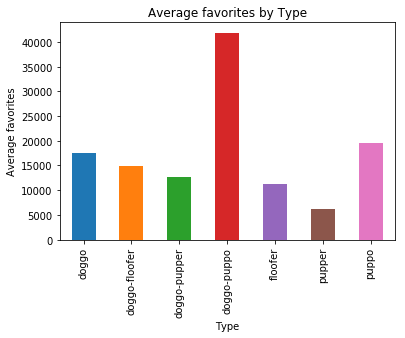

In [72]:
favByType = groupMeanTypeFav.plot(kind='bar', title='Average favorites by Type')
favByType.set_xlabel('Type')
favByType.set_ylabel('Average favorites')

In [73]:
DFMeanName = groupMeanName.to_frame()
DFMeanNameFav = groupMeanNameFav.to_frame()

In [74]:
DFMeanName.sort_values(by='retweet_count', ascending = False)

,retweet_count
name,
Stephan,51562.000000
Duddles,37368.000000
Jamesy,30136.000000
Hurley,16990.000000
Aja,15772.000000
Lilly,15406.000000
Canela,14992.000000
Darrel,14874.000000
Pipsy,14585.000000


In [75]:
DFMeanNameFav.sort_values(by='favorite_count', ascending = False)

,favorite_count
name,
Stephan,111509.0
Jamesy,108698.0
Duddles,92723.0
Aja,69190.0
Lilly,62390.0
Canela,60107.0
Pipsy,42244.0
Barney,41183.0
Alfy,39142.0


In [76]:
DFMeanName['retweet_count'].describe()

count      910.000000
mean      2121.116042
std       3142.730923
min         35.000000
25%        576.500000
50%       1333.000000
75%       2562.400000
max      51562.000000
Name: retweet_count, dtype: float64

In [77]:
DFMeanNameFav['favorite_count'].describe()

count       910.000000
mean       7737.254492
std        9833.131543
min         160.000000
25%        2024.500000
50%        4486.500000
75%       10180.000000
max      111509.000000
Name: favorite_count, dtype: float64

In [78]:
higherThanAvg = DFMeanName.retweet_count > 2121

In [79]:
lowerThanAvg = DFMeanName.retweet_count <= 2121

In [80]:
higherThanAvg.replace(False, np.nan, inplace = True)
higherThanAvg.count()

276

In [81]:
lowerThanAvg.replace(False, np.nan, inplace = True)
lowerThanAvg.count()

634

### Insights:
1. There are 276 tweets with names that have a higher-than-average retweet count, while there are 634 tweets with names that have a lower-than-average retweet count. This means that the high average number of retweets comes mostly from a small number of tweets that get massive numbers of retweets. This is also shown by the 75% number being nowhere near the top values we see in the sort values section.

2. Based on the two graphs presented, the combination of doggo and pupper has much higher averages in both likes and retweets than other types. Including non-combinations.

3. Additionally, our two bar graphs show that the ratio of favorites and retweets tends to be relatively similar between all the types, with the exception of the type combination doggo-floofer. This combination has significantly more favorites than retweets. This is likely due to there only being a single doggo-floofer but why this post got so many more favorites than retweets is unclear.